<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400 >
<h1 align=center><font size = 5>Hacktiv8 Intermediate Python for Data Science</font></h1>

<h1 align=center><font size = 5>Final Project</font></h1>

Klasifikasi level engagement (2 class) berdasarkan data open question survey dengan pertanyaan "hal yang sudah baik dan hal yang perlu dibenahi". Data diambil dari survey Telkom dengan responden sebanyak 5636 orang

# Import Data & Library

In [2]:
from tensorflow.python.keras import models, layers, optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("dataset/Results_EESCES 2020_20200914_small.csv",encoding='latin-1', header=4)
pd.set_option('display.max_columns', None) # Display all columns
df

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Tahun Lahir,Umur,Mulai Kerja,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,CES-RE135,Open-Ended Response.2,Open-Ended Response.3,EES-DEI-Say,EES-DEI-Stay,EES-DEI-Strive,EES-DWI-Agility,EES-DWI-EngagingLeadership,EES-DWI-Talent Focus,EES-DWI-The Work,EES-DWI-The Basic,EES-SB-Agility,EES-SB-Engaging Leadership,EES-SB-Talent Focus,EES-SB-The Work,EES-SB-The Basic,EES-SB-Overall Satisfaction,EES-Bobot-AG1,EES-Bobot-AG2,EES-Bobot-AG3,EES-Bobot-AG4,EES-Bobot-AG5,EES-Bobot-EL1,EES-Bobot-EL2,EES-Bobot-TF1,EES-Bobot-TF2,EES-Bobot-TF3,EES-Bobot-TF4,EES-Bobot-TF5,EES-Bobot-TW1,EES-Bobot-TW2,EES-Bobot-TW3,EES-Bobot-TW4,EES-Bobot-TB1,EES-Bobot-TB2,EES-Bobot-TB3,EES-Bobot-TB4,EES-S-Overal Satisfaction Index,EES-Bobot-SA1,EES-Bobot-SA2,EES-Bobot-SA3,EES-Bobot-ST1,EES-Bobot-ST2,EES-Bobot-ST3,EES-Bobot-SR1,EES-Bobot-SR2,EES-Bobot-SR3,EES Index,Workexperience Index,Level Engagement,Level Engagement 2,CES-RE-Horizontal Communicatioin,CES-RE-Top Management Communication,CES-RE-Supervisory Communication,CES-RE-Diagonal Communication,CES-RE-Subordinate Communication,CES-IN-Corporate Information,CES-IN-Organizational Information,CES-Dimensi Relational,CES-Dimensi Informational,CES-Dimensi Communication Climate,CES-EM1-Manfaat,CES-EM2-Kemudahan,CES-EM3-Frekuensi,CES-Dimensi Efektivitas Media,CES Index,Deviasi EES,Deviasi CES,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1980-04-26,41.0,2014-04-07,6,Gen X,PRIA,Jakarta,Jawa,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,Tidak,Over all sudah baik,Kemudahan menghubungi HC helpdesk,86.666667,86.666667,100.0,84.0,70.0,80.0,75.0,75.0,80.0,60.0,60.0,80.0,80.0,80.0,100.0,80.0,80.0,80.0,80.0,80.0,60.0,100.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,60.0,73.333333,80.0,100.0,80.0,80.0,80.0,100.0,100.0,100.0,100.0,91.111111,76.8,Highly Engaged,Highly Engaged,85.0,80.0,80.0,80.0,86.776789,90.0,68.0,82.520648,77.777778,76.0,81.666667,75.000000,63.333333,73.333333,77.407940,0.608779,0.845447,NaN,NaN,NaN,NaN,NaN,0,0
1,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1978-09-07,42.0,2014-05-01,6,Gen X,WANITA,Jakarta,Jawa,Fasilitas kerja,Reward dan Bonus,Tidak,email blast,blasting information,60.000000,80.000000,80.0,80.0,70.0,76.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,70.000000,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,73.333333,77.2,Moderately Engaged,Moderately Engaged,80.0,75.0,80.0,80.0,86.776789,80.0,80.0,80.020648,80.000000,80.0,75.000000,65.000000,48.333333,62.777778,75.699606,0.419913,0.814697,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY
2,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,1975-10-11,45.0,2001-06-25,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",Tidak,Informasi yang disampaikan cukup jelas,Lebih update & cepat,80.000000,60.000000,80.0,64.0,70.0,60.0,65.0,65.0,60.0,60.0,40.0,40.0,40.0,80.0,60.0,80.0,40.0,80.0,60.0,80.0,60.0,80.0,40.0,60.0,60.0,60.0,60.0,80.0,60.0,60.0,80.0,60.0,60.0,60.0,53.333333,80.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,73.333333,64.8,Moderately Engaged,Moderately Engaged,55.0,65.0,55.0,80.0,86.776789,70.0,60.0,65.020648,64.444444,68.0,80.000000,73.333333,61.666667,71.666667,67.282940,0.679736,0.713797,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0
3,PT. METRA DIGITAL MEDIA,PT. METRA DIGITAL MEDIA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1983-09-29,37.0,2017-10-01,2,Senior Millennial,PRIA,Jakarta,Jawa,Kekeluargaan,Remunerasi masih perlu dipertanyakan,Iya,Kurang setuju,Layanannya,40.00000

# Preprocessing & EDA

In [15]:
df = df.drop(df[df['Divisi'].isna()].index)
df

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Tahun Lahir,Umur,Mulai Kerja,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,CES-RE135,Open-Ended Response.2,Open-Ended Response.3,EES-DEI-Say,EES-DEI-Stay,EES-DEI-Strive,EES-DWI-Agility,EES-DWI-EngagingLeadership,EES-DWI-Talent Focus,EES-DWI-The Work,EES-DWI-The Basic,EES-SB-Agility,EES-SB-Engaging Leadership,EES-SB-Talent Focus,EES-SB-The Work,EES-SB-The Basic,EES-SB-Overall Satisfaction,EES-Bobot-AG1,EES-Bobot-AG2,EES-Bobot-AG3,EES-Bobot-AG4,EES-Bobot-AG5,EES-Bobot-EL1,EES-Bobot-EL2,EES-Bobot-TF1,EES-Bobot-TF2,EES-Bobot-TF3,EES-Bobot-TF4,EES-Bobot-TF5,EES-Bobot-TW1,EES-Bobot-TW2,EES-Bobot-TW3,EES-Bobot-TW4,EES-Bobot-TB1,EES-Bobot-TB2,EES-Bobot-TB3,EES-Bobot-TB4,EES-S-Overal Satisfaction Index,EES-Bobot-SA1,EES-Bobot-SA2,EES-Bobot-SA3,EES-Bobot-ST1,EES-Bobot-ST2,EES-Bobot-ST3,EES-Bobot-SR1,EES-Bobot-SR2,EES-Bobot-SR3,EES Index,Workexperience Index,Level Engagement,Level Engagement 2,CES-RE-Horizontal Communicatioin,CES-RE-Top Management Communication,CES-RE-Supervisory Communication,CES-RE-Diagonal Communication,CES-RE-Subordinate Communication,CES-IN-Corporate Information,CES-IN-Organizational Information,CES-Dimensi Relational,CES-Dimensi Informational,CES-Dimensi Communication Climate,CES-EM1-Manfaat,CES-EM2-Kemudahan,CES-EM3-Frekuensi,CES-Dimensi Efektivitas Media,CES Index,Deviasi EES,Deviasi CES,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1980-04-26,41.0,2014-04-07,6,Gen X,PRIA,Jakarta,Jawa,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,Tidak,Over all sudah baik,Kemudahan menghubungi HC helpdesk,86.666667,86.666667,100.0,84.0,70.0,80.0,75.0,75.0,80.0,60.0,60.0,80.0,80.0,80.0,100.0,80.0,80.0,80.0,80.0,80.0,60.0,100.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,60.0,73.333333,80.0,100.0,80.0,80.0,80.0,100.0,100.0,100.0,100.0,91.111111,76.8,Highly Engaged,Highly Engaged,85.0,80.0,80.0,80.0,86.776789,90.0,68.0,82.520648,77.777778,76.0,81.666667,75.000000,63.333333,73.333333,77.407940,0.608779,0.845447,NaN,NaN,NaN,NaN,NaN,0,0
1,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1978-09-07,42.0,2014-05-01,6,Gen X,WANITA,Jakarta,Jawa,Fasilitas kerja,Reward dan Bonus,Tidak,email blast,blasting information,60.000000,80.000000,80.0,80.0,70.0,76.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,70.000000,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,73.333333,77.2,Moderately Engaged,Moderately Engaged,80.0,75.0,80.0,80.0,86.776789,80.0,80.0,80.020648,80.000000,80.0,75.000000,65.000000,48.333333,62.777778,75.699606,0.419913,0.814697,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY
2,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,1975-10-11,45.0,2001-06-25,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",Tidak,Informasi yang disampaikan cukup jelas,Lebih update & cepat,80.000000,60.000000,80.0,64.0,70.0,60.0,65.0,65.0,60.0,60.0,40.0,40.0,40.0,80.0,60.0,80.0,40.0,80.0,60.0,80.0,60.0,80.0,40.0,60.0,60.0,60.0,60.0,80.0,60.0,60.0,80.0,60.0,60.0,60.0,53.333333,80.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,73.333333,64.8,Moderately Engaged,Moderately Engaged,55.0,65.0,55.0,80.0,86.776789,70.0,60.0,65.020648,64.444444,68.0,80.000000,73.333333,61.666667,71.666667,67.282940,0.679736,0.713797,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0
3,PT. METRA DIGITAL MEDIA,PT. METRA DIGITAL MEDIA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1983-09-29,37.0,2017-10-01,2,Senior Millennial,PRIA,Jakarta,Jawa,Kekeluargaan,Remunerasi masih perlu dipertanyakan,Iya,Kurang setuju,Layanannya,40.00000

In [18]:
# df['Open-Ended Response']
df.columns

Index(['Divisi', 'Company', 'BP', 'Level Company', 'CFU FU Outdated', 'CFU FU',
       'HCBP', 'Tahun Lahir', 'Umur', 'Mulai Kerja', 'Durasi Kerja',
       'Generasi', 'Jenis Kelamin', 'PSA', 'Pulau', 'Open-Ended Response',
       'Open-Ended Response.1', 'CES-RE135', 'Open-Ended Response.2',
       'Open-Ended Response.3', 'EES-DEI-Say', 'EES-DEI-Stay',
       'EES-DEI-Strive', 'EES-DWI-Agility', 'EES-DWI-EngagingLeadership',
       'EES-DWI-Talent Focus', 'EES-DWI-The Work', 'EES-DWI-The Basic',
       'EES-SB-Agility', 'EES-SB-Engaging Leadership', 'EES-SB-Talent Focus',
       'EES-SB-The Work', 'EES-SB-The Basic', 'EES-SB-Overall Satisfaction',
       'EES-Bobot-AG1', 'EES-Bobot-AG2', 'EES-Bobot-AG3', 'EES-Bobot-AG4',
       'EES-Bobot-AG5', 'EES-Bobot-EL1', 'EES-Bobot-EL2', 'EES-Bobot-TF1',
       'EES-Bobot-TF2', 'EES-Bobot-TF3', 'EES-Bobot-TF4', 'EES-Bobot-TF5',
       'EES-Bobot-TW1', 'EES-Bobot-TW2', 'EES-Bobot-TW3', 'EES-Bobot-TW4',
       'EES-Bobot-TB1', 'EES-Bobot-TB2', '

In [5]:
# df['Tahun Lahir'] = pd.to_datetime(df['Tahun Lahir'])
# df['Umur'] = df['Umur'].astype(int)
df['Mulai Kerja'] = pd.to_datetime(df['Mulai Kerja'], errors='coerce')
# df['Durasi Kerja'] = df['Durasi Kerja'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5636 entries, 0 to 5635
Data columns (total 92 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Divisi                               5636 non-null   object 
 1   Company                              5630 non-null   object 
 2   BP                                   5636 non-null   object 
 3   Level Company                        5636 non-null   object 
 4   CFU FU Outdated                      5636 non-null   object 
 5   CFU FU                               5636 non-null   object 
 6   HCBP                                 5636 non-null   object 
 7   Tahun Lahir                          5636 non-null   object 
 8   Umur                                 5636 non-null   float64
 9   Mulai Kerja                          5636 non-null   object 
 10  Durasi Kerja                         5636 non-null   object 
 11  Generasi                      

In [6]:
# backup
full_df = df

In [7]:
# df[['Tahun Lahir', 'Mulai Kerja']]
# df = df.drop(df.columns[0:8], axis=1)

In [9]:
df = df.drop(['Tahun Lahir', 'Mulai Kerja'], axis=1)

In [10]:
df = df.drop(['CES-RE135'], axis=1)

In [11]:
# df = df.drop(df.columns[13:15], axis=1) #drop open ended response 1

In [12]:
df = df.drop(df.columns[17:64], axis=1) #drop open ended response 2

In [13]:
df = df.drop(df.columns[18:35], axis=1) #drop open ended response 2

In [14]:
df.head(5)

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Umur,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,Open-Ended Response.2,Open-Ended Response.3,Level Engagement 2,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,41.0,6,Gen X,PRIA,Jakarta,Jawa,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,Over all sudah baik,Kemudahan menghubungi HC helpdesk,Highly Engaged,NaN,NaN,NaN,NaN,NaN,0,0
1,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,42.0,6,Gen X,WANITA,Jakarta,Jawa,Fasilitas kerja,Reward dan Bonus,email blast,blasting information,Moderately Engaged,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY
2,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,45.0,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",Informasi yang disampaikan cukup jelas,Lebih update & cepat,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0
3,PT. METRA DIGITAL MEDIA,PT. METRA DIGITAL MEDIA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,37.0,2,Senior Millennial,PRIA,Jakarta,Jawa,Kekeluargaan,Remunerasi masih perlu dipertanyakan,Kurang setuju,Layanannya,Disengaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,1.3 DIGITAL SERVICE,1. DIGITAL TECHNOLOGY
4,PT. TELKOMSEL,PT. TELKOMSEL,V,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,28.0,3,Junior Millennial,PRIA,Jakarta,Jawa,reward,tidak ada,Media Chat,Poster,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0


In [15]:
df['open_question'] = "bagus "+df['Open-Ended Response'].fillna('')+". jelek "+df['Open-Ended Response.1'].fillna('')+"."

### Preprocessing String

In [16]:
import re
def preprocess(text):
    
    text = str(text).lower()
    text = re.sub(r'^<div id="video.*>&nbsp;', '', text) # Video-review part
    text = re.sub('https?://[A-Za-z0-9./]+', '', text) # URLs
    
    # Remove HTML Tag
    text = re.sub('<.*?>', '', text)    
    
    # Remove everything in bracket    
    text = re.sub('\[[^)]*\]', '', text)    
    
    text = re.sub('[/]+', ' ', text) # word1/word2 to word1 word2
    # Remove non-alphanumeric characters (but not - and _, might be useful for tokenization)
    text = re.sub('[^A-Za-z0-9-_ ]+', '', text)

    # Remove words that are digits only
    text = re.sub('\b\d+\b', '', text)                
    
    return text

In [17]:
df['open_question'] = df['open_question'].apply(preprocess)

In [18]:
df['open_question']

0       bagus fasilitas keamanan kenyamanan jelek keje...
1            bagus fasilitas kerja jelek reward dan bonus
2       bagus digitalisasi sistem  flexible time for w...
3       bagus kekeluargaan jelek remunerasi masih perl...
4                            bagus reward jelek tidak ada
                              ...                        
5631    bagus mekanisme pola kerja di masa pandemi sek...
5632         bagus lingkungan kerja jelek kejelasan karir
5633    bagus gaji fasilitas kerja faskes jelek ketega...
5634    bagus perusahaan sangat memperhatikan keselama...
5635    bagus budaya kerja jelek sistem performansi ya...
Name: open_question, Length: 5636, dtype: object

In [19]:
from IPython.display import display, clear_output
import time
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

len_df = len(df)
start = 0
# end   = 960205
t1 = time.time()
for entry in df['open_question']:    
    clear_output(wait=True)
    res = [word for word in word_tokenize(entry) if not word in stopwords.words('english') and not word in stopwords.words('indonesian')]
    res = (" ").join(res)  
    p = (start/len_df)*100
    display("%.7f" % p +" - "+str(start))
    df.loc[start,'clean_open_question'] = res
    if start >= len_df:
        break
    start = start+1
    
t2 = time.time()
print('Duration: {0:.2f}s'.format(round(t2-t1,2)))

'99.9822569 - 5635'

Duration: 127.93s


In [20]:
df.head(5)

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Umur,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,Open-Ended Response.2,Open-Ended Response.3,Level Engagement 2,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family,open_question,clean_open_question
0,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,41.0,6,Gen X,PRIA,Jakarta,Jawa,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,Over all sudah baik,Kemudahan menghubungi HC helpdesk,Highly Engaged,NaN,NaN,NaN,NaN,NaN,0,0,bagus fasilitas keamanan kenyamanan jelek keje...,bagus fasilitas keamanan kenyamanan jelek keje...
1,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,42.0,6,Gen X,WANITA,Jakarta,Jawa,Fasilitas kerja,Reward dan Bonus,email blast,blasting information,Moderately Engaged,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY,bagus fasilitas kerja jelek reward dan bonus,bagus fasilitas kerja jelek reward bonus
2,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,45.0,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",Informasi yang disampaikan cukup jelas,Lebih update & cepat,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0,bagus digitalisasi sistem flexible time for w...,bagus digitalisasi sistem flexible time work j...
3,PT. METRA DIGITAL MEDIA,PT. METRA DIGITAL MEDIA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,37.0,2,Senior Millennial,PRIA,Jakarta,Jawa,Kekeluargaan,Remunerasi masih perlu dipertanyakan,Kurang setuju,Layanannya,Disengaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,1.3 DIGITAL SERVICE,1. DIGITAL TECHNOLOGY,bagus kekeluargaan jelek remunerasi masih perl...,bagus kekeluargaan jelek remunerasi
4,PT. TELKOMSEL,PT. TELKOMSEL,V,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,28.0,3,Junior Millennial,PRIA,Jakarta,Jawa,reward,tidak ada,Media Chat,Poster,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0,bagus reward jelek tidak ada,bagus reward jelek


In [21]:
df[['Open-Ended Response','Open-Ended Response.1','open_question','clean_open_question']][:10]

,Open-Ended Response,Open-Ended Response.1,open_question,clean_open_question
0,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,bagus fasilitas keamanan kenyamanan jelek keje...,bagus fasilitas keamanan kenyamanan jelek keje...
1,Fasilitas kerja,Reward dan Bonus,bagus fasilitas kerja jelek reward dan bonus,bagus fasilitas kerja jelek reward bonus
2,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",bagus digitalisasi sistem flexible time for w...,bagus digitalisasi sistem flexible time work j...
3,Kekeluargaan,Remunerasi masih perlu dipertanyakan,bagus kekeluargaan jelek remunerasi masih perl...,bagus kekeluargaan jelek remunerasi
4,reward,tidak ada,bagus reward jelek tidak ada,bagus reward jelek
5,Bos saya sudah bisa Excel dan mengerjakan repo...,Pimpinan kurang mendengarkan aspirasi karyawan.,bagus bos saya sudah bisa excel dan mengerjaka...,bagus bos excel report bulanan jelek pimpinan ...
6,-,-,bagus - jelek -,bagus - jelek -
7,nurturing people,remunerasi / benefit untuk karyawan misalnya s...,bagus nurturing people jelek remunerasi bene...,bagus nurturing people jelek remunerasi benefi...
8,"Fasilitas, remunerasi",-,bagus fasilitas remunerasi jelek -,bagus fasilitas remunerasi jelek -
9,visi misi perusahaan,"Talent, apresiasi terhadap kinerja karyawan, p...",bagus visi misi perusahaan jelek talent apresi...,bagus visi misi perusahaan jelek talent apresi...


In [22]:
df.isna().sum()

Divisi                     0
Company                    6
BP                         0
Level Company              0
CFU FU Outdated            0
CFU FU                     0
HCBP                       0
Umur                       0
Durasi Kerja               0
Generasi                   0
Jenis Kelamin              0
PSA                        0
Pulau                      0
Open-Ended Response        3
Open-Ended Response.1      3
Open-Ended Response.2      3
Open-Ended Response.3      3
Level Engagement 2         0
Agama                    276
Marital                  277
Employee Group           271
Employee Subgroup        271
Level Pendidikan         271
Short Job Function         0
Short Job Family           0
open_question              0
clean_open_question        0
dtype: int64

In [23]:
df['Level Engagement 2'].value_counts()

Highly Engaged        3170
Moderately Engaged    2316
Disengaged             150
Name: Level Engagement 2, dtype: int64

<AxesSubplot:>

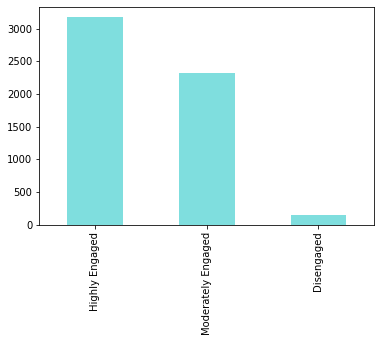

In [24]:
df['Level Engagement 2'].value_counts().plot(
                        kind='bar',
                        alpha=0.5,                         
                        color='c'
                        )

# Class Imbalance

In [25]:
df = df.drop(df[df['Level Engagement 2']=='Disengaged'].index)

<AxesSubplot:>

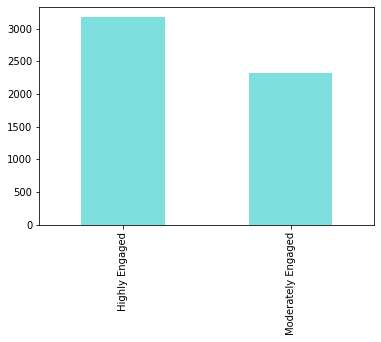

In [26]:
df['Level Engagement 2'].value_counts().plot(
                        kind='bar',
                        alpha=0.5,                         
                        color='c'
                        )

In [27]:
# Balance Class
sample_size = 2316 # needs to be less than the number of observations in the minority class
sample_df = df.groupby('Level Engagement 2').apply(lambda x: x.sample(sample_size))

In [28]:
sample_df = sample_df.reset_index(level=0, drop=True)

In [29]:
sample_df = sample_df.sort_index()

In [30]:
sample_df.groupby("Level Engagement 2").size()

Level Engagement 2
Highly Engaged        2316
Moderately Engaged    2316
dtype: int64

In [31]:
sample_df['word_count'] = sample_df['clean_open_question'].str.split().str.len()

In [32]:
result = [x for x in sample_df['word_count']]
print("Mean : {}".format(np.mean(result)))
print("Max  : {}".format(sample_df['word_count'].max()))
print("Min  : {}".format(sample_df['word_count'].min()))

Mean : 13.70768566493955
Max  : 171
Min  : 2


In [33]:
sample_df[sample_df['word_count']<=2]

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Umur,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,Open-Ended Response.2,Open-Ended Response.3,Level Engagement 2,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family,open_question,clean_open_question,word_count
378,DIVISI TELKOM REGIONAL V,"PT. TELEKOMUNIKASI INDONESIA,TBK",IV,Telkom,FU-DIGITAL BUSINESS,CFU-CONSUMER,HCBP 1,56.0,36,Baby Boomer,PRIA,Surabaya,Jawa,",,,,,,,,",",,,,,,,,,",",,,,,",",,,,,",Highly Engaged,NaN,NaN,NaN,NaN,NaN,0,0,bagus jelek,bagus jelek,2
674,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,VI,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,30.0,4,Senior Millennial,PRIA,Jakarta,Jawa,.,.,.,.,Moderately Engaged,islam,single,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY,bagus jelek,bagus jelek,2
1307,DIVISI BUSINESS SERVICE,"PT. TELEKOMUNIKASI INDONESIA,TBK",III,Telkom,FU-DIGITAL BUSINESS,CFU-ENTERPRISE,HCBP 2,50.0,25,Gen X,PRIA,Jakarta,Jawa,.....,.....,.....,.....,Highly Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S2,2.1 SALES,2. CUSTOMER CENTRICITY,bagus jelek,bagus jelek,2
1633,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,VI,AP,FU-DIGITAL BUSINESS,CFU-ENTERPRISE,HCBP 2,24.0,5,Junior Millennial,PRIA,Jakarta,Jawa,.,.,.,.,Highly Engaged,islam,single,Karyawan Tetap,Aktif Normal,SMU,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY,bagus jelek,bagus jelek,2
1808,PT. TELKOMEDIKA,PT. TELKOMEDIKA,VI,AP,FU-DIGITAL BUSINESS,CFU-ENTERPRISE,HCBP 2,32.0,7,Senior Millennial,WANITA,Malang,Jawa,.............,................,"Sudah baik, namun perlu ditingkatkan lagi",PEnyampaian yang lebih komunikatif dan timbal ...,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,3.6 GENERAL AFFAIRS & SUPPORT,3. CORPORATE ENABLERS,bagus jelek,bagus jelek,2
2179,PT. TELKOMSEL,PT. TELKOMSEL,III,AP,FU-DIGITAL BUSINESS,CFU-MOBILE,HCBP 1,34.0,11,Senior Millennial,PRIA,Jakarta,Jawa,Baik,Baik,Baik,baik,Moderately Engaged,Hindu,menikah,Karyawan Tetap,Aktif Normal,S1,0,0,bagus baik jelek baik,bagus jelek,2
2352,PT. ADMEDIKA,PT. ADMEDIKA,VII,AP,FU-DIGITAL BUSINESS,CFU-ENTERPRISE,HCBP 2,28.0,6,Junior Millennial,WANITA,JKT0,Jawa,Tidak ada,tidak ada,Tidak ada,tidak ada,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,D3,3.4 HUMAN CAPITAL,3. CORPORATE ENABLERS,bagus tidak ada jelek tidak ada,bagus jelek,2
2411,PT. MELON INDONESIA,PT. MELON INDONESIA,IV,AP,FU-DIGITAL BUSINESS,FU-DIGITAL BUSINESS,HCBP 4,30.0,3,Senior Millennial,PRIA,BANDUNG,Jawa,Secara umum baik,Tidak ada,Sudah baik,Tidak ada,Moderately Engaged,islam,single,Karyawan Tetap,Aktif Normal,S1,0,1. DIGITAL TECHNOLOGY,bagus secara umum baik jelek tidak ada,bagus jelek,2
2454,DIVISI TELKOM REGIONAL IV,"PT. TELEKOMUNIKASI INDONESIA,TBK",VI,Telkom,FU-DIGITAL BUSINESS,CFU-CONSUMER,HCBP 1,25.0,1,Junior Millennial,WANITA,Semarang,Jawa,sudah baik,sudah baik,baik,baik,Moderately Engaged,islam,single,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY,bagus sudah baik jelek sudah baik,bagus jelek,2
2461,INTERNAL AUDIT,"PT. TELEKOMUNIKASI INDONESIA,TBK",IV,Telkom,FU-DIGITAL BUSINESS,CEO'S OFFICE,HCBP 5,32.0,7,Senior Millennial,WANITA,Bandung,Jawa,/,â,-,-,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,"3.2 CORP AFFAIRS,REGULATION & COMPLIANCE",3. CORPORATE ENABLERS,bagus jelek,bagus jelek,2


In [34]:
X = sample_df['clean_open_question'].values
y = sample_df['Level Engagement 2'].values

# Train Test Split

In [124]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22) #, test_size=0.1
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22) #, test_size=0.1

In [125]:
print(X_train[100])
print(y_test[100])

bagus pola karier terbuka jelek fasilitas kesehatan
Highly Engaged


In [126]:
# Convert all word to string
X_train = [str (item) for item in X_train]
X_valid = [str (item) for item in X_valid]
X_test = [str (item) for item in X_test]

# Tokenize Words

In [127]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

MAX_FEATURES = 250
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

In [128]:
print(X_train[100])

[1, 93, 118, 206, 2, 7, 9]


In [129]:
tokenizer.word_index['fasilitas']

7

In [130]:
from sklearn.preprocessing import LabelEncoder

# Encode Label
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_valid = Encoder.fit_transform(y_valid)
y_test = Encoder.fit_transform(y_test)

In [131]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

# Padding

In [132]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = max(len(X_train) for X_train in X_train)
print(MAX_LENGTH)
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
X_valid = pad_sequences(X_valid, maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)

77


In [133]:
print(X_train[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1 131
 219   2  18 132  60]


# Build Model 1

In [134]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.60
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32 #32 8
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.60
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

In [135]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 77, 32)            8000      
_________________________________________________________________
dropout_12 (Dropout)         (None, 77, 32)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 16,353
Trainable params: 16,353
Non-trainable params: 0
_________________________________________________________________


In [136]:
history = model.fit(X_train, y_train, batch_size=256, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
11/11 [==============================] - 3s 115ms/step - loss: 0.6933 - accuracy: 0.5037 - val_loss: 0.6928 - val_accuracy: 0.5109
Epoch 2/150
11/11 [==============================] - 0s 31ms/step - loss: 0.6927 - accuracy: 0.5103 - val_loss: 0.6924 - val_accuracy: 0.5236
Epoch 3/150
11/11 [==============================] - 0s 30ms/step - loss: 0.6921 - accuracy: 0.5119 - val_loss: 0.6919 - val_accuracy: 0.5213
Epoch 4/150
11/11 [==============================] - 0s 30ms/step - loss: 0.6905 - accuracy: 0.5310 - val_loss: 0.6916 - val_accuracy: 0.5086
Epoch 5/150
11/11 [==============================] - 0s 31ms/step - loss: 0.6909 - accuracy: 0.5295 - val_loss: 0.6908 - val_accuracy: 0.5374
Epoch 6/150
11/11 [==============================] - 0s 29ms/step - loss: 0.6885 - accuracy: 0.5666 - val_loss: 0.6896 - val_accuracy: 0.5650
Epoch 7/150
11/11 [==============================] - 0s 30ms/step - loss: 0.6860 - accuracy: 0.5734 - val_loss: 0.6879 - val_accuracy: 0.5800
Epoch

11/11 [==============================] - 0s 36ms/step - loss: 0.5416 - accuracy: 0.7139 - val_loss: 0.7703 - val_accuracy: 0.5777
Epoch 116/150
11/11 [==============================] - 0s 36ms/step - loss: 0.5415 - accuracy: 0.6966 - val_loss: 0.7843 - val_accuracy: 0.5708
Epoch 117/150
11/11 [==============================] - 0s 37ms/step - loss: 0.5493 - accuracy: 0.6945 - val_loss: 0.7813 - val_accuracy: 0.5777
Epoch 118/150
11/11 [==============================] - 0s 36ms/step - loss: 0.5319 - accuracy: 0.7231 - val_loss: 0.7856 - val_accuracy: 0.5903
Epoch 119/150
11/11 [==============================] - 0s 37ms/step - loss: 0.5370 - accuracy: 0.7060 - val_loss: 0.7825 - val_accuracy: 0.5823
Epoch 120/150
11/11 [==============================] - 0s 37ms/step - loss: 0.5286 - accuracy: 0.7154 - val_loss: 0.7803 - val_accuracy: 0.5880
Epoch 121/150
11/11 [==============================] - 0s 37ms/step - loss: 0.5395 - accuracy: 0.7118 - val_loss: 0.8043 - val_accuracy: 0.5800
Epoch 

In [139]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 6ms/step - loss: 0.8421 - accuracy: 0.5587


[0.8421118855476379, 0.5587219595909119]

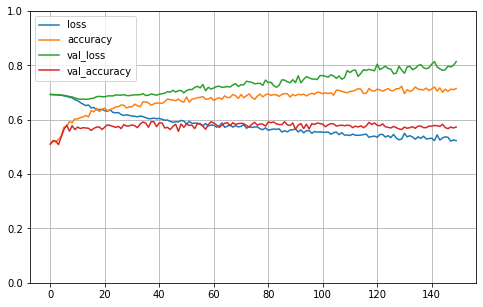

In [140]:
# Model 1
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

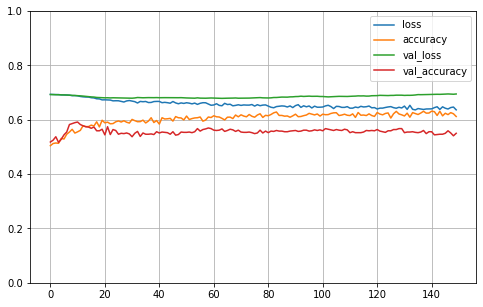

In [94]:
# Model 1
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

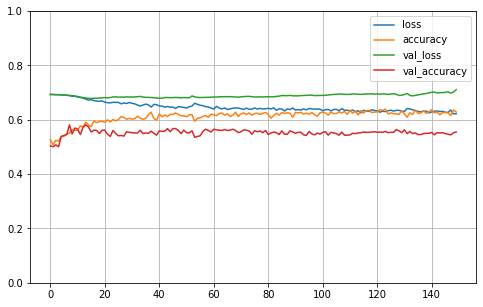

In [90]:
# Model 1
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

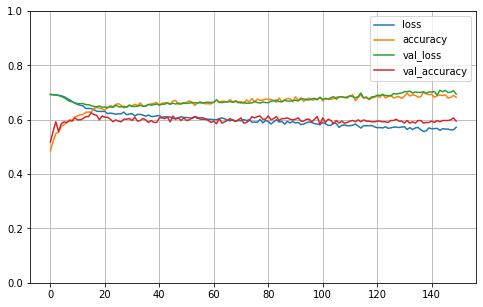

In [48]:
# Model 1
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

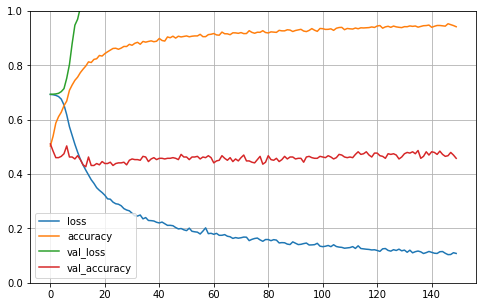

In [130]:
# Model 1
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Build Model 2: Categorical Crossentropy

In [95]:
y_train = tf.keras.utils.to_categorical(y_train, 2, dtype="float32")
y_valid = tf.keras.utils.to_categorical(y_valid, 2, dtype="float32")
y_test = tf.keras.utils.to_categorical(y_test, 2, dtype="float32")

In [96]:
print(X_train.shape)
print(y_train.shape)

(2605, 57)
(2605, 2)


In [101]:
# Model 2: Categorical_crossentropy

model2 = tf.keras.models.Sequential()

model2.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model2.add(tf.keras.layers.LSTM(units=32, dropout=0.5))

model2.add(tf.keras.layers.Dense(2, activation='softmax'))

In [102]:
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 57, 32)            3200      
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 11,586
Trainable params: 11,586
Non-trainable params: 0
_________________________________________________________________


In [103]:
# history 2
history2 = model2.fit(X_train, y_train, batch_size=256, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
11/11 [==============================] - 2s 72ms/step - loss: 0.6928 - accuracy: 0.5121 - val_loss: 0.6928 - val_accuracy: 0.5040
Epoch 2/150
11/11 [==============================] - 0s 24ms/step - loss: 0.6923 - accuracy: 0.5122 - val_loss: 0.6921 - val_accuracy: 0.5178
Epoch 3/150
11/11 [==============================] - 0s 25ms/step - loss: 0.6904 - accuracy: 0.5341 - val_loss: 0.6916 - val_accuracy: 0.5213
Epoch 4/150
11/11 [==============================] - 0s 24ms/step - loss: 0.6895 - accuracy: 0.5423 - val_loss: 0.6897 - val_accuracy: 0.5627
Epoch 5/150
11/11 [==============================] - 0s 24ms/step - loss: 0.6874 - accuracy: 0.5648 - val_loss: 0.6883 - val_accuracy: 0.5535
Epoch 6/150
11/11 [==============================] - 0s 25ms/step - loss: 0.6832 - accuracy: 0.5733 - val_loss: 0.6855 - val_accuracy: 0.5639
Epoch 7/150
11/11 [==============================] - 0s 24ms/step - loss: 0.6794 - accuracy: 0.5837 - val_loss: 0.6824 - val_accuracy: 0.5673
Epoch 

11/11 [==============================] - 0s 30ms/step - loss: 0.6184 - accuracy: 0.6457 - val_loss: 0.7156 - val_accuracy: 0.5604
Epoch 116/150
11/11 [==============================] - 0s 29ms/step - loss: 0.6178 - accuracy: 0.6354 - val_loss: 0.7181 - val_accuracy: 0.5547
Epoch 117/150
11/11 [==============================] - 0s 29ms/step - loss: 0.6033 - accuracy: 0.6480 - val_loss: 0.7236 - val_accuracy: 0.5501
Epoch 118/150
11/11 [==============================] - 0s 29ms/step - loss: 0.6169 - accuracy: 0.6375 - val_loss: 0.7142 - val_accuracy: 0.5604
Epoch 119/150
11/11 [==============================] - 0s 29ms/step - loss: 0.6076 - accuracy: 0.6438 - val_loss: 0.7161 - val_accuracy: 0.5604
Epoch 120/150
11/11 [==============================] - 0s 29ms/step - loss: 0.6079 - accuracy: 0.6415 - val_loss: 0.7277 - val_accuracy: 0.5512
Epoch 121/150
11/11 [==============================] - 0s 28ms/step - loss: 0.6156 - accuracy: 0.6472 - val_loss: 0.7212 - val_accuracy: 0.5535
Epoch 

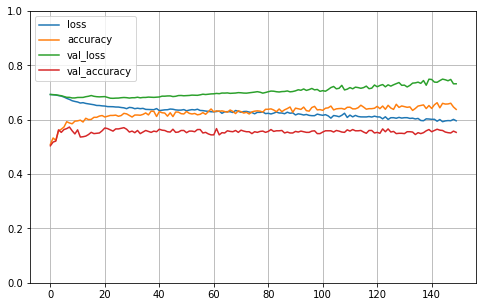

In [104]:
# Model 2

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [108]:
model2.evaluate(X_test, y_test)

37/37 [==============================] - 0s 5ms/step - loss: 0.7260 - accuracy: 0.5509


[0.7260379195213318, 0.5509499311447144]

In [107]:
from sklearn.metrics import confusion_matrix


X_new = X_test
y_pred = model2.predict(X_test)

# np.argmax(model.predict(X_new), axis=-1)

cm = confusion_matrix(y_test.argmax(axis=1), np.argmax(y_pred, axis=1))
print(cm)


[[299 302]
 [218 339]]


# Skipped

In [12]:
# fill na to zeros
df[df.columns[79:]] = df[df.columns[79:]].fillna(0)

In [13]:
#Decode object to int
obj_col = df.select_dtypes(['object']).columns
# obj_col
df[obj_col] = df[obj_col].apply(lambda x: pd.factorize(x)[0]) #Convert object data to int (decode)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5636 entries, 0 to 5635
Data columns (total 86 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Divisi                               5636 non-null   int64  
 1   Company                              5636 non-null   int64  
 2   BP                                   5636 non-null   int64  
 3   Level Company                        5636 non-null   int64  
 4   CFU FU Outdated                      5636 non-null   int64  
 5   CFU FU                               5636 non-null   int64  
 6   HCBP                                 5636 non-null   int64  
 7   Umur                                 5636 non-null   float64
 8   Durasi Kerja                         5636 non-null   int64  
 9   Generasi                             5636 non-null   int64  
 10  Jenis Kelamin                        5636 non-null   int64  
 11  PSA                           

In [33]:
df.head(4)

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Umur,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,CES-RE135,EES-DEI-Say,EES-DEI-Stay,EES-DEI-Strive,EES-DWI-Agility,EES-DWI-EngagingLeadership,EES-DWI-Talent Focus,EES-DWI-The Work,EES-DWI-The Basic,EES-SB-Agility,EES-SB-Engaging Leadership,EES-SB-Talent Focus,EES-SB-The Work,EES-SB-The Basic,EES-SB-Overall Satisfaction,EES-Bobot-AG1,EES-Bobot-AG2,EES-Bobot-AG3,EES-Bobot-AG4,EES-Bobot-AG5,EES-Bobot-EL1,EES-Bobot-EL2,EES-Bobot-TF1,EES-Bobot-TF2,EES-Bobot-TF3,EES-Bobot-TF4,EES-Bobot-TF5,EES-Bobot-TW1,EES-Bobot-TW2,EES-Bobot-TW3,EES-Bobot-TW4,EES-Bobot-TB1,EES-Bobot-TB2,EES-Bobot-TB3,EES-Bobot-TB4,EES-S-Overal Satisfaction Index,EES-Bobot-SA1,EES-Bobot-SA2,EES-Bobot-SA3,EES-Bobot-ST1,EES-Bobot-ST2,EES-Bobot-ST3,EES-Bobot-SR1,EES-Bobot-SR2,EES-Bobot-SR3,EES Index,Workexperience Index,Level Engagement,Level Engagement 2,CES-RE-Horizontal Communicatioin,CES-RE-Top Management Communication,CES-RE-Supervisory Communication,CES-RE-Diagonal Communication,CES-RE-Subordinate Communication,CES-IN-Corporate Information,CES-IN-Organizational Information,CES-Dimensi Relational,CES-Dimensi Informational,CES-Dimensi Communication Climate,CES-EM1-Manfaat,CES-EM2-Kemudahan,CES-EM3-Frekuensi,CES-Dimensi Efektivitas Media,CES Index,Deviasi EES,Deviasi CES,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,0,0,0,0,0,0,0,41.0,0,0,0,0,0,0,86.666667,86.666667,100.0,84.0,70.0,80.0,75.0,75.0,80.0,60.0,60.0,80.0,80.0,80.0,100.0,80.0,80.0,80.0,80.0,80.0,60.0,100.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,60.0,73.333333,80.0,100.0,80.0,80.0,80.0,100.0,100.0,100.0,100.0,91.111111,76.8,0,0,85.0,80.0,80.0,80.0,86.776789,90.0,68.0,82.520648,77.777778,76.0,81.666667,75.000000,63.333333,73.333333,77.407940,0.608779,0.845447,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,42.0,0,0,1,0,0,0,60.000000,80.000000,80.0,80.0,70.0,76.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,70.000000,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,73.333333,77.2,1,1,80.0,75.0,80.0,80.0,86.776789,80.0,80.0,80.020648,80.000000,80.0,75.000000,65.000000,48.333333,62.777778,75.699606,0.419913,0.814697,1,1,1,1,1,1,1
2,2,2,1,0,1,1,1,45.0,1,0,0,1,1,0,80.000000,60.000000,80.0,64.0,70.0,60.0,65.0,65.0,60.0,60.0,40.0,40.0,40.0,80.0,60.0,80.0,40.0,80.0,60.0,80.0,60.0,80.0,40.0,60.0,60.0,60.0,60.0,80.0,60.0,60.0,80.0,60.0,60.0,60.0,53.333333,80.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,73.333333,64.8,1,1,55.0,65.0,55.0,80.0,86.776789,70.0,60.0,65.020648,64.444444,68.0,80.000000,73.333333,61.666667,71.666667,67.282940,0.679736,0.713797,2,1,1,1,1,0,0
3,3,3,0,0,0,0,0,37.0,2,1,0,0,0,1,40.000000,26.666667,60.0,72.0,70.0,28.0,50.0,45.0,40.0,40.0,20.0,60.0,20.0,40.0,80.0,80.0,60.0,80.0,60.0,60.0,80.0,40.0,20.0,20.0,20.0,40.0,60.0,20.0,60.0,60.0,20.0,60.0,60.0,40.0,36.666667,20.0,60.0,40.0,20.0,40.0,20.0,60.0,60.0,60.0,42.222222,53.0,2,2,55.0,55.0,55.0,60.0,60.000000,60.0,32.0,56.250000,44.444444,52.0,58.333333,58.333333,48.333333,55.000000,51.923611,1.007725,0.761957,2,1,1,1,1,2,1


Text(0.5, 1.0, 'Distribution of those with and without alcohol consumption problem')

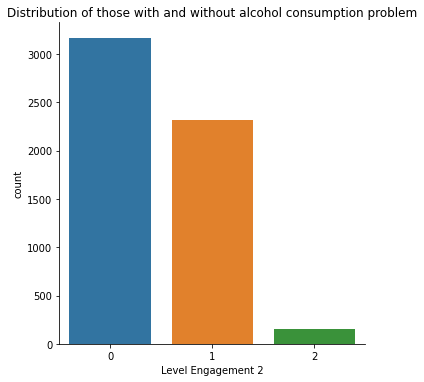

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Level Engagement 2", kind="count", data=df)
plt.title('Distribution of those with and without alcohol consumption problem')

In [15]:
df['Level Engagement 2'].value_counts()

0    3170
1    2316
2     150
Name: Level Engagement 2, dtype: int64

Drop class 2, because of small data

In [16]:
df = df.drop(df[df['Level Engagement 2']==2].index)

Text(0.5, 1.0, 'Distribution of those with and without alcohol consumption problem')

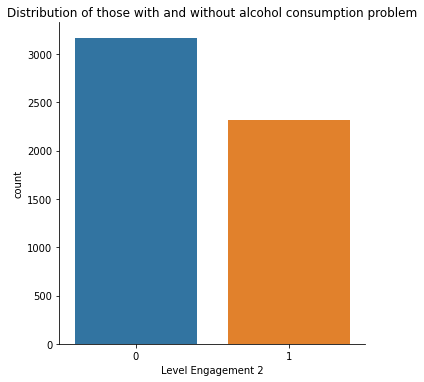

In [17]:
sns.catplot(x="Level Engagement 2", kind="count", data=df)
plt.title('Distribution of those with and without alcohol consumption problem')

In [100]:
pd.set_option('display.max_rows', None) # Display all rows

In [34]:
# Correlation
df.corrwith(df['Level Engagement 2']).sort_values(ascending=False)

Level Engagement 2    1.000000
Level Engagement      0.997997
Generasi              0.216202
Marital               0.147446
Deviasi EES           0.132760
                        ...   
EES-Bobot-SR2        -0.725057
EES-DEI-Stay         -0.728982
EES-DEI-Say          -0.737429
EES-DEI-Strive       -0.775907
EES Index            -0.863787
Length: 86, dtype: float64

In [98]:
df['Level Engagement 2'].value_counts()

0    3170
1    2316
Name: Level Engagement 2, dtype: int64

In [105]:
y = df['Level Engagement 2']
y

0       0
1       1
2       1
4       1
5       0
6       1
7       1
8       0
9       1
10      1
11      0
12      1
13      1
14      1
15      0
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      0
27      0
28      1
29      0
30      0
31      0
32      1
33      1
34      1
35      0
36      1
37      0
38      1
39      1
40      1
41      0
42      1
43      1
44      0
45      1
46      0
47      0
48      0
49      1
50      1
51      1
52      1
54      1
55      0
56      0
57      0
58      0
59      0
60      1
61      1
62      0
63      1
64      0
65      1
66      0
68      1
69      1
70      0
71      0
72      0
73      0
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      0
82      1
83      0
84      1
85      1
86      0
87      0
88      0
89      0
90      0
91      1
92      0
93      0
94      0
95      1
96      0
97      0
98      1
99      1
100     1
101     0
102     1
103     1


In [106]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [107]:
X = df
X = X.drop(['Level Engagement 2','Level Engagement'], axis=1)
X = X.values

In [108]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [109]:
X.min()

-4.866874985100169

### Splitting Data

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_valid = scaler.transform(X_valid)
# X_test = scaler.transform(X_test)

In [111]:
class_names=['Highly Engaged', 'Moderately Engaged']

In [112]:
#checking the shape of the training set and test set
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)
# print(y_train.value_counts(normalize = True))
# print(y_test.value_counts(normalize = True))

Training set - Features:  (3085, 77) Target:  (3085,)
Test set - Features:  (1372, 77) Target:  (1372,)


In [113]:
X_train.max()

6.571158685160943

### Class Imbalance

In [114]:
# separate minority and majority classes
highly_engaged = df[df['Level Engagement 2']==0]
moderately_engaged = df[df['Level Engagement 2']==1]

# Get a class count to understand the class imbalance.
print('Highly Engaged count: '+ str(len(highly_engaged)))
print('Moderately Engaged count: '+ str(len(moderately_engaged)))

Highly Engaged count: 3170
Moderately Engaged count: 2316


In [115]:
from sklearn.utils import resample

In [116]:
# upsample minority: alcohol problem
moderately_engaged_upsampled = resample(moderately_engaged,
                          replace=True, # sample with replacement
                          n_samples=len(highly_engaged), # match number in majority class
                          random_state=22) # reproducible results
moderately_engaged_upsampled.shape

(3170, 79)

In [117]:
# combine majority and upsampled minority
upsampled = pd.concat([highly_engaged, moderately_engaged_upsampled])
# upsampled
# check new class counts
upsampled['Level Engagement 2'].value_counts()

1    3170
0    3170
Name: Level Engagement 2, dtype: int64

In [118]:
y_train_up = upsampled['Level Engagement 2']
X_train_up = upsampled.drop(columns = 'Level Engagement 2', axis=1)
X_train_up.shape

# print(y_train_u.value_counts(normalize = True))
# print(X_train_u.value_counts(normalize = True))

(6340, 78)

In [119]:
# encoder = LabelEncoder()
# encoder.fit(y_train_up)
# y_train_up = encoder.transform(y_train_up)
# y_train_up

In [120]:
# scaler = StandardScaler()
# scaler.fit(X_train_up)
# X_train_up = scaler.transform(X_train_up)
# X_train_up

In [123]:
# print(X_train_up.max())
print(y_train_up.max())

1


### Resplit Data

In [124]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train_up, y_train_up, random_state=22)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22)

In [125]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [126]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_valid = encoder.transform(y_valid)
y_test = encoder.transform(y_test)

In [129]:
print(X_train.min())
print(y_train.min())

-4.8860432384399735
0


In [130]:
# Testing

unique, counts = np.unique(y_valid, return_counts=True)
dict(zip(unique, counts))

{0: 578, 1: 611}

In [131]:
X_train

array([[-0.82375874, -0.22492871,  1.33111543, ...,  2.04300034,
        -1.0718185 , -0.14847691],
       [ 0.43411303, -0.34651364,  0.68678835, ...,  1.17027923,
         1.66329347,  1.41088103],
       [-0.31274833, -0.34651364, -1.2461929 , ...,  1.48322468,
         0.1309717 , -0.24629118],
       ...,
       [ 0.6306555 , -0.34651364,  1.97544252, ..., -0.77240678,
        -0.11617697, -0.6786586 ],
       [-0.19482286, -0.34651364, -0.60186582, ...,  0.6336439 ,
        -0.47866169,  0.91755688],
       [-0.82375874, -0.22492871,  1.97544252, ...,  0.7460398 ,
         1.00423034, -1.25136825]])

In [174]:
# from keras.utils import to_categorical 

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_valid = scaler.transform(X_valid)
# X_test = scaler.transform(X_test)

In [ ]:
# y_train=to_categorical(y_train)
# y_test=to_categorical(y_test)
# y_valid=to_categorical(y_valid)

In [175]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# encoder.fit(y_train)
# y_train = encoder.transform(y_train)
# y_test = encoder.transform(y_test)
# y_valid = encoder.transform(y_valid)

In [132]:
y_train

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [93]:
# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
# y_valid = np.asarray(y_valid).astype('float32').reshape((-1,1))

In [133]:
# X_train
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(3566,)
(1585,)
(1189,)


### Training

In [134]:
import tensorflow as tf
from tensorflow import keras

In [135]:
np.random.seed(42)
tf.random.set_seed(42)

In [136]:
# All Feature
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)


Epoch 1/100
112/112 [==============================] - 1s 7ms/step - loss: 0.2769 - accuracy: 0.8734 - val_loss: 0.0113 - val_accuracy: 0.9966
Epoch 2/100
112/112 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 3/100
112/112 [==============================] - 1s 5ms/step - loss: 5.0325e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 4/100
112/112 [==============================] - 1s 6ms/step - loss: 2.5418e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 5/100
112/112 [==============================] - 1s 5ms/step - loss: 1.4097e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9992
Epoch 6/100
112/112 [==============================] - 1s 6ms/step - loss: 8.6160e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 0.9992
Epoch 7/100
112/112 [==============================] - 1s 5ms/step - loss: 6.5138e-05 - accuracy: 1.0000 - val_loss: 0.0017 - 

[0.0007038616458885372, 0.9993690848350525]

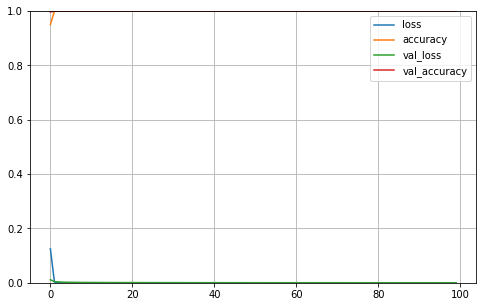

In [137]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
# y_pred
# .info()

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 3170, 1: 2316}

In [91]:
# X_train
# .values
class_names

['Highly Engaged', 'Moderately Engaged']

In [140]:
from sklearn.metrics import confusion_matrix


X_new = X_test
y_pred = np.round(model.predict(X_new))

# np.argmax(model.predict(X_new), axis=-1)

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[783   0]
 [  1 801]]


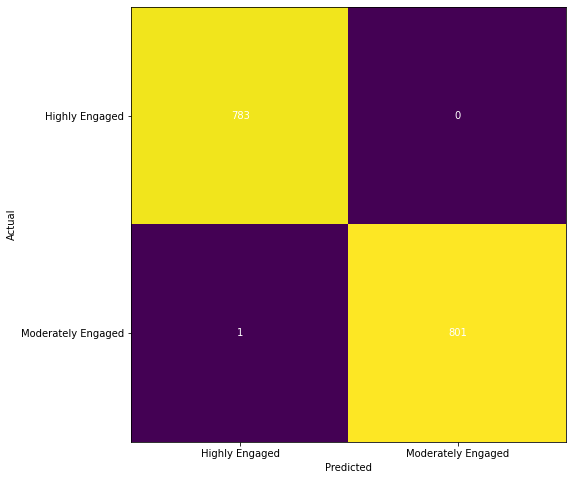

In [141]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=class_names)
ax.yaxis.set(ticks=(0, 1), ticklabels=class_names)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Remove unrelevant feature

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5486 entries, 0 to 5635
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Divisi              5486 non-null   int64  
 1   Company             5486 non-null   int64  
 2   BP                  5486 non-null   int64  
 3   Level Company       5486 non-null   int64  
 4   CFU FU Outdated     5486 non-null   int64  
 5   CFU FU              5486 non-null   int64  
 6   HCBP                5486 non-null   int64  
 7   Umur                5486 non-null   float64
 8   Durasi Kerja        5486 non-null   int64  
 9   Generasi            5486 non-null   int64  
 10  Jenis Kelamin       5486 non-null   int64  
 11  PSA                 5486 non-null   int64  
 12  Pulau               5486 non-null   int64  
 13  Level Engagement 2  5486 non-null   int64  
 14  Agama               5486 non-null   int64  
 15  Marital             5486 non-null   int64  
 16  Employ

In [19]:
pd.set_option('display.max_columns', None) # Display all columns
df.corrwith(df['Level Engagement 2']).sort_values(ascending=False)

Level Engagement 2    1.000000
Level Engagement      1.000000
Generasi              0.196082
Marital               0.134869
Jenis Kelamin         0.128363
                        ...   
EES-DEI-Say          -0.692776
EES-Bobot-SR3        -0.696490
EES-Bobot-SR2        -0.704812
EES-DEI-Strive       -0.753240
EES Index            -0.835130
Length: 86, dtype: float64

In [21]:
df = df.drop(df.columns[13:61], axis=1) #drop survey
# df = df.drop(df.columns[14:31], axis=1) #drop survey 2

In [63]:
# df = df.drop(df[df['Level Engagement 2']==2].index)

In [23]:
df['Level Engagement 2'].value_counts()

0    3170
1    2316
Name: Level Engagement 2, dtype: int64

In [24]:
df['Umur'] = df['Umur'].astype(int)

In [88]:
df.shape

(5486, 21)

In [25]:
y = df['Level Engagement 2']
y

0       0
1       1
2       1
4       1
5       0
       ..
5631    0
5632    1
5633    1
5634    0
5635    0
Name: Level Engagement 2, Length: 5486, dtype: int64

In [26]:
X = df
X = X.drop(['Level Engagement 2'], axis=1)
X = X.values
X

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  0, ...,  1,  1,  1],
       [ 2,  2,  1, ...,  1,  0,  0],
       ...,
       [60,  5,  3, ...,  1, 12,  2],
       [ 2,  2,  0, ...,  3,  0,  0],
       [60,  5,  5, ...,  2, 12,  2]], dtype=int64)

In [27]:
X.shape

(5486, 20)

In [28]:
# separate minority and majority classes
highly_engaged = df[df['Level Engagement 2']==0]
moderately_engaged = df[df['Level Engagement 2']==1]

# Get a class count to understand the class imbalance.
print('Highly Engaged count: '+ str(len(highly_engaged)))
print('Moderately Engaged count: '+ str(len(moderately_engaged)))

Highly Engaged count: 3170
Moderately Engaged count: 2316


In [29]:
from sklearn.utils import resample

In [30]:
# upsample minority: alcohol problem
moderately_engaged_upsampled = resample(moderately_engaged,
                          replace=True, # sample with replacement
                          n_samples=len(highly_engaged), # match number in majority class
                          random_state=22) # reproducible results
moderately_engaged_upsampled.shape

(3170, 21)

In [31]:
# combine majority and upsampled minority
upsampled = pd.concat([highly_engaged, moderately_engaged_upsampled])
# upsampled
# check new class counts
upsampled['Level Engagement 2'].value_counts()

1    3170
0    3170
Name: Level Engagement 2, dtype: int64

In [32]:
y_train_up = upsampled['Level Engagement 2']
X_train_up = upsampled.drop(columns = 'Level Engagement 2', axis=1)
X_train_up.shape

(6340, 20)

In [33]:
X.shape

(5486, 20)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Resample
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train_up, y_train_up, random_state=22, test_size=0.15)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22, test_size=0.15)

# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_valid = encoder.transform(y_valid)
y_test = encoder.transform(y_test)

In [37]:
# Relevant Feature
model = keras.models.Sequential([
    
    keras.layers.Dense(8, activation="relu", input_shape=X_train.shape[1:]),
#     keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(5, activation='relu'),    
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

model.compile(
    loss= tf.keras.losses.binary_crossentropy,
    optimizer= tf.keras.optimizers.Adam(), #'rmsprop', 
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)


Epoch 1/50
144/144 [==============================] - 3s 11ms/step - loss: 0.8096 - accuracy: 0.5294 - val_loss: 0.6800 - val_accuracy: 0.5760
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 0.7137 - accuracy: 0.5405 - val_loss: 0.6777 - val_accuracy: 0.6143
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.5605 - val_loss: 0.6797 - val_accuracy: 0.6057
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.6903 - accuracy: 0.5478 - val_loss: 0.6810 - val_accuracy: 0.5995
Epoch 5/50
144/144 [==============================] - 1s 6ms/step - loss: 0.6798 - accuracy: 0.5586 - val_loss: 0.6797 - val_accuracy: 0.6180
Epoch 6/50
144/144 [==============================] - 1s 8ms/step - loss: 0.6806 - accuracy: 0.5546 - val_loss: 0.6784 - val_accuracy: 0.6255
Epoch 7/50
144/144 [==============================] - 1s 9ms/step - loss: 0.6740 - accuracy: 0.5720 - val_loss: 0.6754 - val_accuracy: 0.6354
Epoch

[0.6317470073699951, 0.683491051197052]

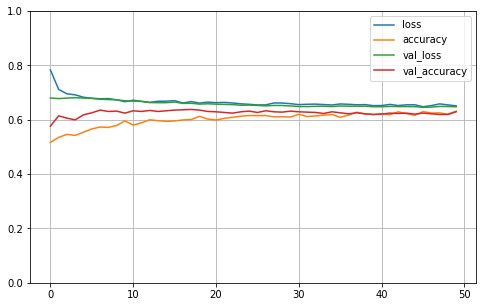

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

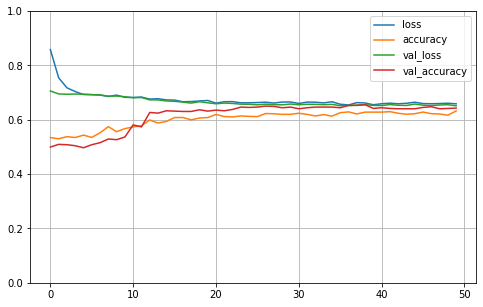

In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
# y_valid.shape
# X_train
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                315       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [39]:
X_new = X_test
y_pred = np.round(model.predict(X_new))

# np.argmax(model.predict(X_new), axis=-1)

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[351 127]
 [174 299]]


In [42]:
X_test.shape

(1585, 13)

In [ ]:
Kenapa Akurasi dan Validasi berbeda jauh: overfit

In [104]:
# full_df.Umur.value_counts(ascending=False)
# df.Umur.value_counts(ascending=False)

### Try best fitur

In [105]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selector_valid = SelectKBest(f_classif, k=10)

#Fitting selector object to training set
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

#Fitting selector object to validation set
selector_valid.fit(X_valid, y_valid)

selected_col_val = X_valid.columns[selector_valid.get_support()]
removed_col_val = X_valid.columns[~selector_valid.get_support()]


X_train_kbest = X_train[selected_columns]
X_test_kbest = X_test[selected_columns]
print(X_train_kbest.shape, X_test_kbest.shape)

X_valid_kbest = X_valid[selected_col_val]
print(X_valid_kbest.shape)

(4057, 10) (1268, 10)
(1015, 10)


In [106]:
selected_col_val

Index(['BP', 'Level Company', 'CFU FU', 'HCBP', 'Umur', 'Durasi Kerja',
       'Generasi', 'Jenis Kelamin', 'Marital', 'Level Pendidikan'],
      dtype='object')

In [107]:
# Best Feature
model = keras.models.Sequential([
    keras.layers.Dense(6, activation="relu", input_shape=X_train_kbest.shape[1:]),
#     keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

model.compile(
    loss= tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(X_train_kbest, y_train, epochs=200, validation_data=(X_valid_kbest, y_valid))
model.evaluate(X_test_kbest, y_test)


Epoch 1/200
127/127 [==============================] - 2s 8ms/step - loss: 3.4181 - accuracy: 0.4990 - val_loss: 3.9316 - val_accuracy: 0.4788
Epoch 2/200
127/127 [==============================] - 1s 6ms/step - loss: 0.6983 - accuracy: 0.5688 - val_loss: 4.0745 - val_accuracy: 0.4788
Epoch 3/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6809 - accuracy: 0.5780 - val_loss: 4.3357 - val_accuracy: 0.4788
Epoch 4/200
127/127 [==============================] - 1s 5ms/step - loss: 0.6718 - accuracy: 0.5913 - val_loss: 4.5943 - val_accuracy: 0.4788
Epoch 5/200
127/127 [==============================] - 1s 5ms/step - loss: 0.6593 - accuracy: 0.6221 - val_loss: 4.9861 - val_accuracy: 0.4788
Epoch 6/200
127/127 [==============================] - 1s 6ms/step - loss: 0.6595 - accuracy: 0.6192 - val_loss: 5.3647 - val_accuracy: 0.4788
Epoch 7/200
127/127 [==============================] - 1s 5ms/step - loss: 0.6536 - accuracy: 0.6242 - val_loss: 5.7277 - val_accuracy: 0.4788

Epoch 58/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6215 - accuracy: 0.6569 - val_loss: 6.5492 - val_accuracy: 0.4788
Epoch 59/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6171 - accuracy: 0.6652 - val_loss: 6.5224 - val_accuracy: 0.4788
Epoch 60/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6239 - accuracy: 0.6606 - val_loss: 6.4708 - val_accuracy: 0.4788
Epoch 61/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6270 - accuracy: 0.6599 - val_loss: 6.5265 - val_accuracy: 0.4788
Epoch 62/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6256 - accuracy: 0.6565 - val_loss: 6.5718 - val_accuracy: 0.4788
Epoch 63/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6288 - accuracy: 0.6609 - val_loss: 6.3792 - val_accuracy: 0.4788
Epoch 64/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6324 - accuracy: 0.6553 - val_loss: 6.4184 - val_accuracy:

Epoch 115/200
127/127 [==============================] - 1s 8ms/step - loss: 0.6127 - accuracy: 0.6728 - val_loss: 5.7370 - val_accuracy: 0.4788
Epoch 116/200
127/127 [==============================] - 1s 8ms/step - loss: 0.6148 - accuracy: 0.6708 - val_loss: 5.7275 - val_accuracy: 0.4788
Epoch 117/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6212 - accuracy: 0.6707 - val_loss: 5.7016 - val_accuracy: 0.4788
Epoch 118/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6272 - accuracy: 0.6624 - val_loss: 5.6062 - val_accuracy: 0.4788
Epoch 119/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6141 - accuracy: 0.6746 - val_loss: 5.6891 - val_accuracy: 0.4788
Epoch 120/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6235 - accuracy: 0.6685 - val_loss: 5.6681 - val_accuracy: 0.4788
Epoch 121/200
127/127 [==============================] - 1s 7ms/step - loss: 0.6163 - accuracy: 0.6684 - val_loss: 5.6341 - val_ac

[0.6186814904212952, 0.67586749792099]

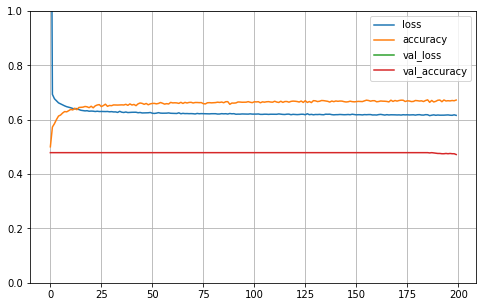

In [108]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

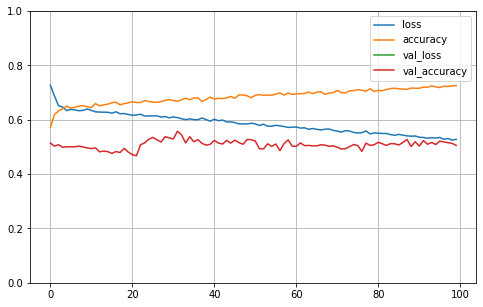

In [211]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

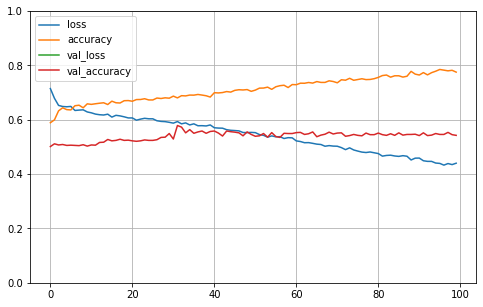

In [78]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
X_train.shape[1:]

(20,)

In [65]:
# word for word in word_tokenize(entry) if not word in stopwords.words('english') and not word in stopwords.words('indonesian')

test1 = ['money', 'bags','and','jelek', 'bagus']
for x in test1:
    if not x in stopwords.words('english') and not x in stopwords.words('indonesian'):
        print(x)

money
bags
jelek
bagus
